In [2]:
import zipfile
import pandas as pd
import os

zip_file_path = r"C:\Users\sanja\Downloads\txt_reviews.zip"
output_dir_path = r"C:\Users\sanja\Downloads\txt_reviews_extract"

def unzip(zip_file_path, output_dir_path):
    """
    Unzips the specified zip file into the specified directory.
    
    Parameters:
    zip_file_path (str): The path to the zip file.
    output_dir_path (str): The directory where the contents will be extracted.
    """
    print(f"Unzipping {zip_file_path} to {output_dir_path}...")
    with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        zip_ref.extractall(output_dir_path)
    print("Data uncompressed successfully...")

def read_image_files(output_dir_path):
    """
    Reads all image files from the specified directory using os.walk and returns
    a list of dictionaries. Each dictionary contains the file name and its path.
    
    Parameters:
    output_dir_path (str): The directory to search for image files.
    
    Returns:
    list: A list of dictionaries with file name and path.
    """
    files_data = []
    print(f"Searching for image files in {output_dir_path}...")
    for root, dirs, files in os.walk(output_dir_path):
        print(f"Reading image files from {root}... Detected {len(files)} files in {root} directory.")
        for file_name in files:
            if file_name.lower().endswith((".txt")):
                file_path = os.path.join(root, file_name)
                print(f"Processing file: {file_path}")
                files_data.append({"file_name": file_name, "file_path": file_path})
    if not files_data:
        print("No image files found.")
    return files_data

def load_into_df(files_data):
    """
    Loads the list of dictionaries into a pandas DataFrame.
    
    Parameters:
    files_data (list): The list of dictionaries to load into the DataFrame.
    
    Returns:
    DataFrame: The resulting pandas DataFrame.
    """
    if files_data:
        df = pd.DataFrame(files_data)
        print("DataFrame created successfully.")
    else:
        df = pd.DataFrame()
        print("No image files found, empty DataFrame created.")
    return df

unzip(zip_file_path, output_dir_path)
files_data = read_image_files(output_dir_path)
print(f"Total image files processed: {len(files_data)}")
df = load_into_df(files_data)
print(df)

Unzipping C:\Users\sanja\Downloads\txt_reviews.zip to C:\Users\sanja\Downloads\txt_reviews_extract...
Data uncompressed successfully...
Searching for image files in C:\Users\sanja\Downloads\txt_reviews_extract...
Reading image files from C:\Users\sanja\Downloads\txt_reviews_extract... Detected 0 files in C:\Users\sanja\Downloads\txt_reviews_extract directory.
Reading image files from C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews... Detected 568454 files in C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews directory.
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_1.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_10.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_100.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_1000.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_10000.txt
Processing file

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_98521.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_98522.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_98523.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_98524.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_98525.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_98526.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_98527.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_98528.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_98529.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_9853.txt
Processing file: C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\review_98530.txt


### Import Libraries

In [4]:

import re
import os
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
files = os.listdir(r"C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews")

In [6]:
ProductId = []
UserId = []
ProfileName = []
HelpfullnessNumerator = []+
HelpfulnessDenominator = []
Score = []
Time = []
ReviewSummary = []
ReviewText = []
for file,num in zip(files,range(0,len(files))):
    with open(fr"C:\Users\sanja\Downloads\txt_reviews_extract\txt_reviews\{file}",encoding= "utf-8") as txt:
        txt_read = txt.read()

        try:
            Product_id = re.findall(r"ProductId:\s(.*)",txt_read)
            ProductId.append(Product_id[0])
            
            User_id = re.findall(r'UserId:\s(.*)',txt_read)
            UserId.append(User_id[0])
            
            Profile_name = re.findall(r"ProfileName:\s(.*)",txt_read)
            ProfileName.append(Profile_name[0])
            
            Helpfullness_numerator = re.findall(r"HelpfulnessNumerator:\s(.*)",txt_read)
            HelpfullnessNumerator.append(Helpfullness_numerator[0])
            
            Helpfullness_denomerator = re.findall(r"HelpfulnessDenominator:\s(.*)",txt_read)
            HelpfulnessDenominator.append(Helpfullness_denomerator[0])
            
            score = re.findall(r"Score:\s(.*)",txt_read)
            Score.append(score[0])
            
            time = re.findall(r"Time:\s(.*)",txt_read)
            Time.append(time[0])
            
            Review_Summary = re.findall(r'ReviewSummary:\s(.*)',txt_read)
            ReviewSummary.append(Review_Summary[0])
            
            Review_text = re.findall(r"ReviewText:\s(.*)",txt_read)
            ReviewText.append(Review_text[0])
        except:
            print(f'skipping the {file}')

### Creat DataFrame

In [8]:
df = pd.DataFrame({"ProductId":ProductId,
                   "UserId":UserId,
                   "ProfileName":ProfileName,
                   "HelpfullnessNumerator":HelpfullnessNumerator,
                   "HelpfulnessDenominator":HelpfulnessDenominator,
                   "Score":Score,
                   "Time":Time,
                   "ReviewSummary":ReviewSummary,
                   "ReviewText":ReviewText})

### Raw Dataset

In [9]:
df

,ProductId,UserId,ProfileName,HelpfullnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...
...,...,...,...,...,...,...,...,...,...
568449,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...
568450,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...
568451,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
568452,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...


In [10]:
def clean(doc):
    
    #remove the special characters and digits
    regex = "[^a-zA-Z0-9]"
    doc = re.sub(regex," ",doc)
     
    # It converts the lower case
    doc = doc.lower()
    
    #Tokanaization
    tokens = nltk.word_tokenize(doc)
    
    #stop words removel
    stop_words = set(stopwords.words("english"))
    filter_words = [word for word in tokens if word not in stop_words]
    
    #lemmataization
    lemmataizer  = WordNetLemmatizer()
    lemmataizer_tokens = [lemmataizer.lemmatize(tokens) for tokens in filter_words]
    
    #join and return
    return " ".join(lemmataizer_tokens)
    

In [11]:
def tokenizer(doc):
    return nltk.word_tokenize(doc)

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...


True

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...


True

In [18]:
df['Review_text'] = df['ReviewText'].apply(lambda x:clean(x))

#### Data Set

In [19]:
df

,ProductId,UserId,ProfileName,HelpfullnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Review_text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,healthy dog food good digestion also good smal...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,fed golden retriever hated eat gave terrible d...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",admit sucker large quantity 12 oz shopping hot...
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,7 week old gas constipation problem first 5 we...
...,...,...,...,...,...,...,...,...,...,...
568449,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...,love noodle little spicy wife perfct
568450,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...,love buy another box done last one
568451,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,late father law used rating system meal partic...
568452,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,favorite brand korean ramen spicy used eating ...


#### Target Variable

<Axes: xlabel='Score', ylabel='count'>

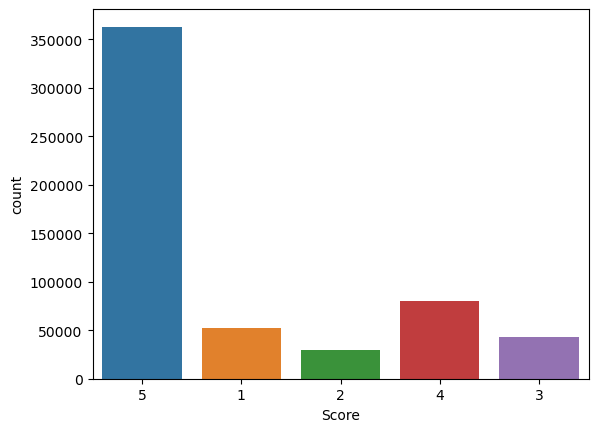

In [21]:
sns.countplot(data = df,x = "Score")

In [22]:
df.columns

Index(['ProductId', 'UserId', 'ProfileName', 'HelpfullnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'ReviewSummary',
       'ReviewText', 'Review_text'],
      dtype='object')

### Seggregate Input and Outputs

In [23]:
X = df.drop(columns="Score")

In [24]:
y = df[["Score"]]

### Split the Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [28]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(397917, 9) (170537, 9)
(397917, 1) (170537, 1)


### Data Preparation

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vect = CountVectorizer(token_pattern=None,
                           tokenizer=tokenizer,
                           ngram_range=(1, 1), 
                           lowercase=False, 
                           preprocessor=clean, 
                           stop_words=None)

In [30]:
X_train_transformed = vect.fit_transform(X_train['ReviewText'])

In [31]:
X_test_transformed = vect.transform(X_test['ReviewText'])

### Model Building 

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg = LinearRegression()

In [34]:
reg.fit(X_train_transformed,y_train)

LinearRegression()

In [35]:
y_pred = reg.predict(X_test_transformed)

In [36]:
from sklearn import metrics

In [37]:
metrics.mean_absolute_error(y_pred,y_test)

0.7544137673416046